In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [191]:
import warnings
warnings.filterwarnings('ignore')

In [192]:
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [193]:
mouse_drug_data_df=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df=pd.read_csv(clinical_trial_data_to_load)

In [194]:
merge_data_df=clinical_trial_df.merge(mouse_drug_data_df, how='left', left_on="Mouse ID", right_on="Mouse ID")

In [195]:
merge_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin
1903,p438,45,61.433892,1,Ceftamin
1904,x773,45,58.634971,4,Placebo


In [197]:
mean_tumor = merge_data_df.loc[:, ['Drug', 'Timepoint','Tumor Volume (mm3)']]

In [199]:
mean_tumor_group=mean_tumor.groupby(['Drug','Timepoint'])
tumor_groupings=mean_tumor_group.mean()
tumor_groupings

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [163]:
standarderror=mean_tumor_group.sem()
sem_tumor=standarderror.unstack(level=0)["Tumor Volume (mm3)"]
sem_tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [164]:
unstacked_tumor=tumor_groupings.unstack(level=0)["Tumor Volume (mm3)"]
unstacked_tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


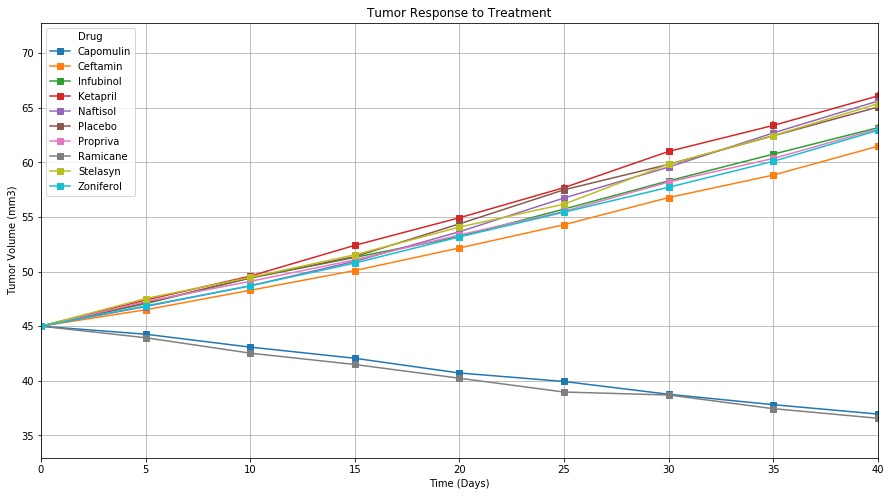

In [165]:
fig=unstacked_tumor.plot(title="Tumor Response to Treatment", marker='s',yerr=sem_mets_unstack,figsize=(15,8))
fig.set_xlabel("Time (Days)")
fig.set_ylabel("Tumor Volume (mm3)")
fig.set_xlim(0,40,10)
fig.grid('on', which='major', axis='y' )
fig.grid('off', which='major', axis='x' )

In [166]:
met_sites = merge_data_df.loc[:, ['Drug', 'Timepoint','Metastatic Sites']]
mets_group=met_sites.groupby(['Drug','Timepoint'])
mean_mets=mets_group.mean()
mets_unstack=mean_mets.unstack(level=0)["Metastatic Sites"]

In [167]:
sem_mets=mets_group.sem()
sem_mets_unstack=sem_mets.unstack(level=0)["Metastatic Sites"]

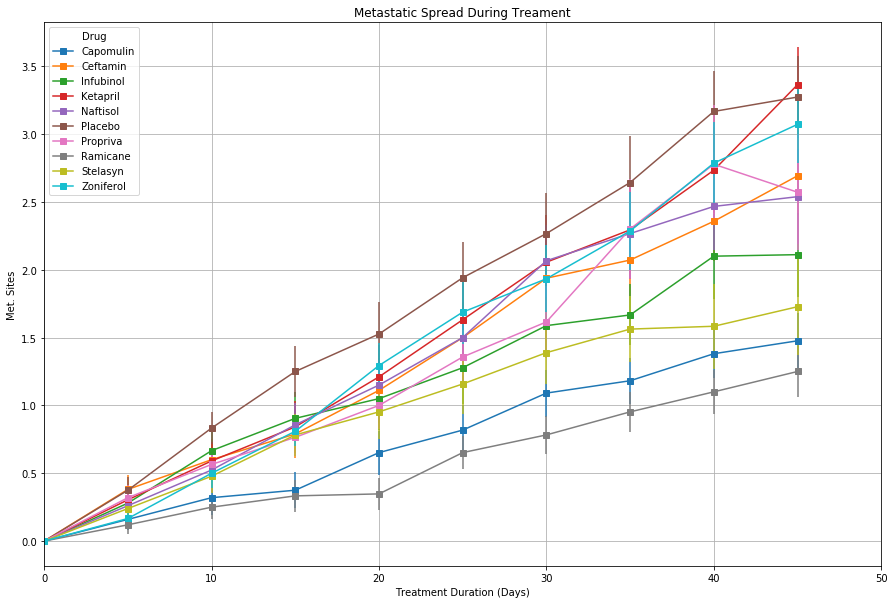

In [168]:
fig0=mets_unstack.plot(title="Metastatic Spread During Treament", marker='s',yerr=sem_mets_unstack,figsize=(15,10))
fig0.set_xlabel("Treatment Duration (Days)")
fig0.set_ylabel("Met. Sites")
fig0.set_xlim(0,50,10)
fig0.grid('on', which='major', axis='y' )
fig0.grid('on', which='major', axis='x' )

In [169]:
mousedata=merge_data_df.loc[:, ['Mouse ID','Drug', 'Timepoint']]

In [170]:
mousegroup=mousedata.groupby(["Drug","Timepoint"])
count_mouse=mousegroup.count()/25*100
unstack_mouse=count_mouse.unstack([0])["Mouse ID"]
unstack_mouse

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


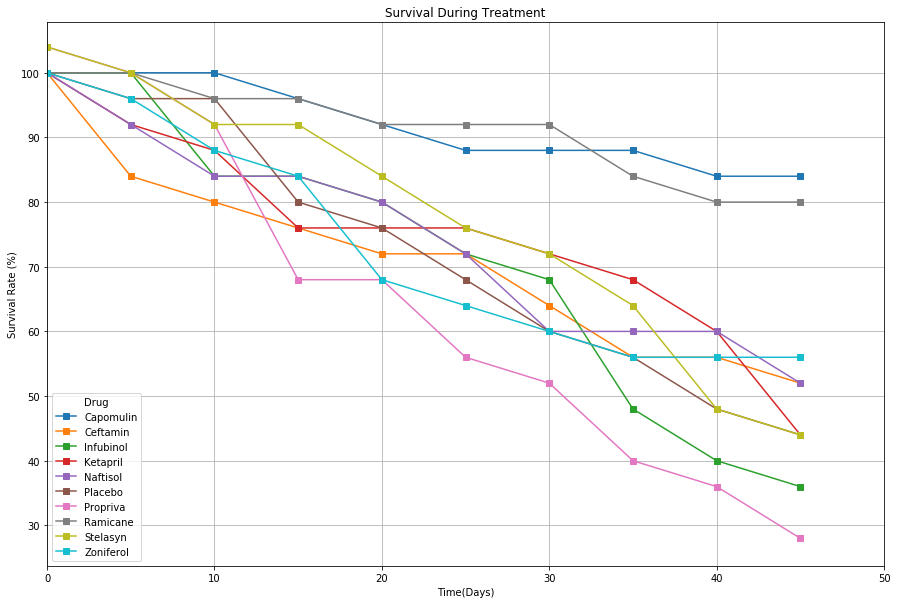

In [171]:
fig1=unstack_mouse.plot(title="Survival During Treatment", marker='s',yerr=sem_mets_unstack,figsize=(15,10))
fig1.set_xlabel("Time(Days)")
fig1.set_ylabel("Survival Rate (%)")
fig1.set_xlim(0,50,10)
fig1.grid('on', which='major', axis='x' )
fig1.grid('on', which='major', axis='y' )

In [172]:
percentchange_drug=unstacked_tumor.drop([0,5,10,15,20,25,30,35,40])
drugpercent=percentchange_drug/45-1
finished_percent=drugpercent*100
finished_percent

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
45,-19.475303,42.516492,46.123472,57.028795,53.923347,51.29796,47.241175,-22.3209,52.085134,46.579751


In [173]:
dropped_drugs=finished_percent.drop(columns=['Ceftamin', 'Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])
dropped_drugs

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
45,-19.475303,46.123472,57.028795,51.29796


In [181]:
idx=["Capomulin","Infubinol","Ketapril","Placebo"]
heights=[-19,46,57,51]
data=pd.DataFrame(heights,index=idx)
data.rename(columns={0:"Heights"},inplace=True)
data

,Heights
Capomulin,-19
Infubinol,46
Ketapril,57
Placebo,51


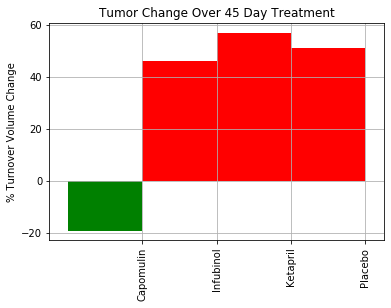

In [201]:
idx=["Capomulin","Infubinol","Ketapril","Placebo"]
heights=[-19,46,57,51]
data=pd.DataFrame(heights,index=idx)
data.rename(columns={0:"Heights"},inplace=True)

data["positive"]=data["Heights"]>0

data.plot(kind='bar',
        position=1,
        width=1,
        grid=True,
        yticks=[-20,0,20,40,60],
        color=[data.positive.map({True:"r",False:"g"})],
        legend=False)

plt.ylabel('% Turnover Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')

plt.grid('on', which='major', axis='x' )
plt.grid('on', which='major', axis='y' )
